#Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import roc_auc
from imblearn.combine import SMOTETomek
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix,roc_curve,log_loss,roc_auc_score

#Data Loading and Cleaning

In [ ]:
df = pd.read_csv("bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [ ]:
df.shape

(41188, 16)

##Checking Numeric and Categorical Columns

In [ ]:
num_col = df.select_dtypes(include = np.number).columns
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
cat_col = df.select_dtypes(include = ['object','category']).columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


##Check Missing Data

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Also, most Machine learning models could not be applied in the presence of such missing values. Hence it is necessary to identify missing values and treat them.

In the code below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.




In [ ]:
df.replace(['unknown','Na'],np.nan,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          40858 non-null  object
 2   marital      41108 non-null  object
 3   education    39457 non-null  object
 4   default      32591 non-null  object
 5   housing      40198 non-null  object
 6   loan         40198 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
per = df.isnull().sum()/len(df) * 100
per

,0
age,0.000000
job,0.801204
marital,0.194231
education,4.202680
default,20.872584
housing,2.403613
loan,2.403613
contact,0.000000
month,0.000000
day_of_week,0.000000


Missing Value Imputation:
For all categorical columns, missing values were imputed using the mode (most frequent category) of each column. This approach preserves the distribution of the data without introducing bias.

In [ ]:
for column in cat_col:
  mode = df[column].mode()[0]
  df[column] = df[column].replace(np.nan,mode)

##Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance.

In [ ]:
  df['y'].value_counts()/len(df)*100

,count
y,
no,88.734583
yes,11.265417


In [ ]:
len(df)

41188

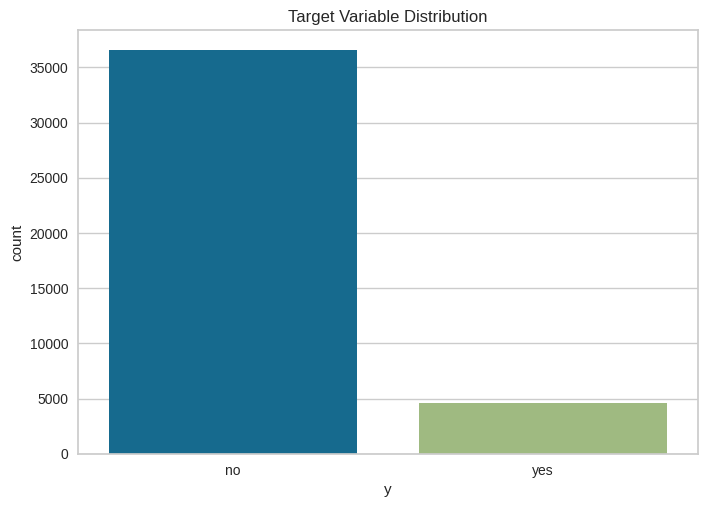

In [ ]:
#Plotting a bar Chart to visualize the class imbalance

sns.countplot(x='y', data=df, hue = 'y')
plt.title('Target Variable Distribution')
plt.show()


##Observations




*  The target variable y is imbalanced, with approximately 88.73% of
observations labeled as "no" and only 11.27% labeled as "yes".



#Exploratory Data Analysis

##Univariate Analysis of Categorical Columns

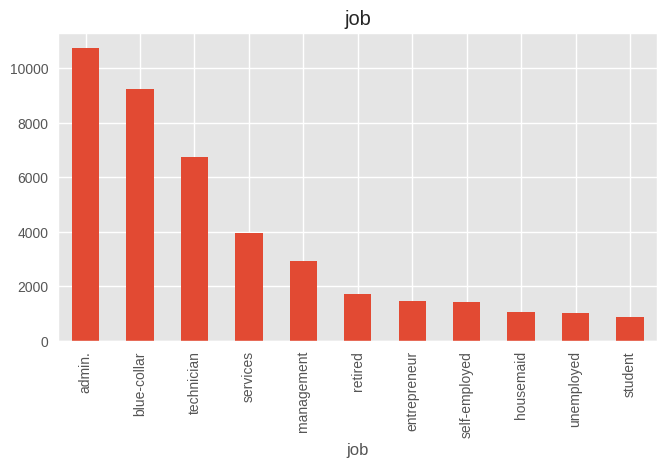

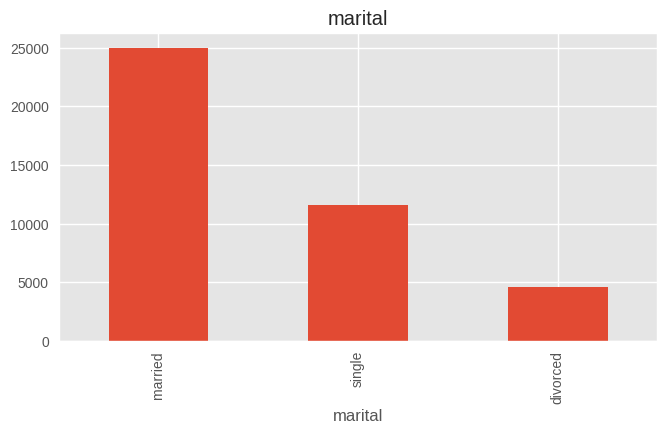

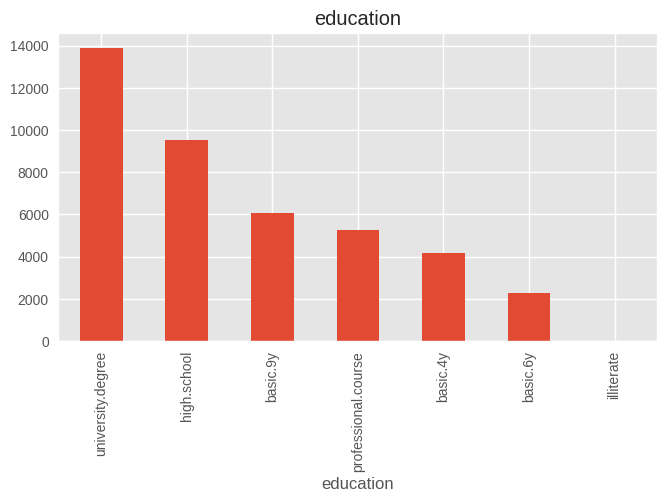

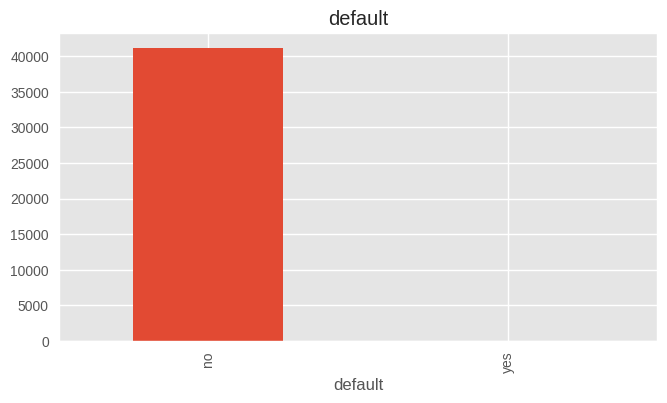

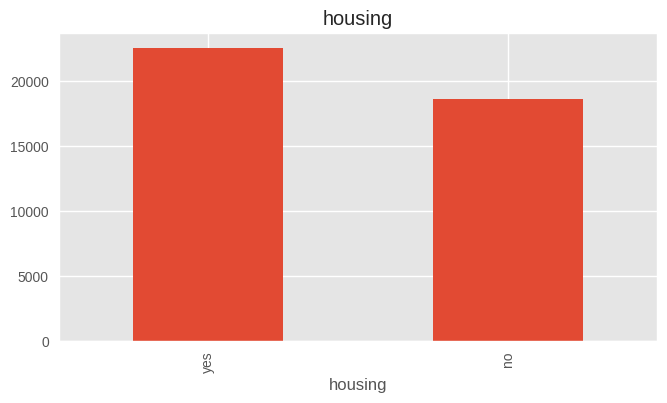

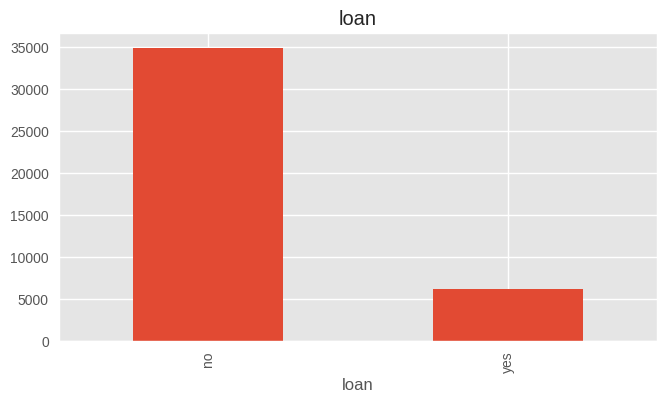

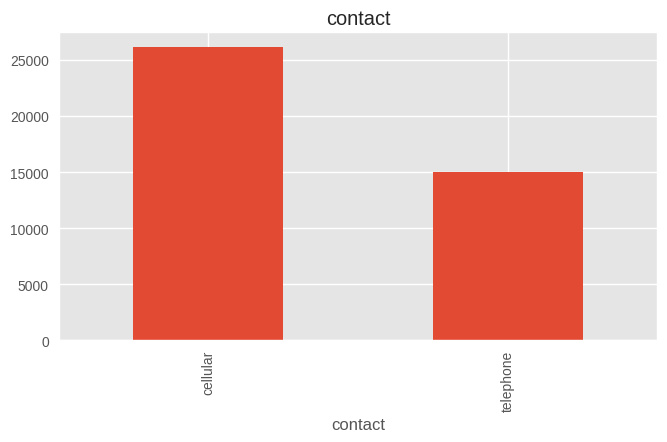

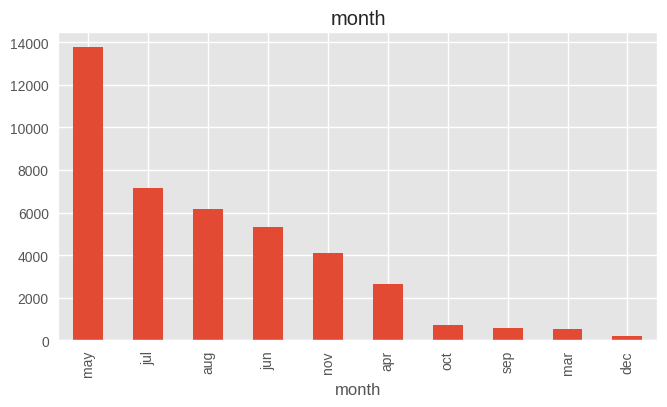

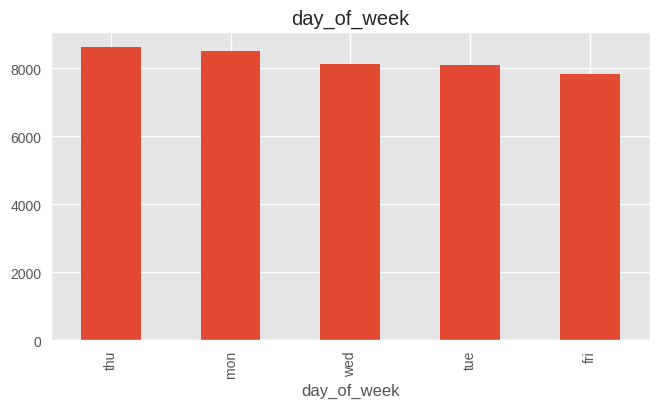

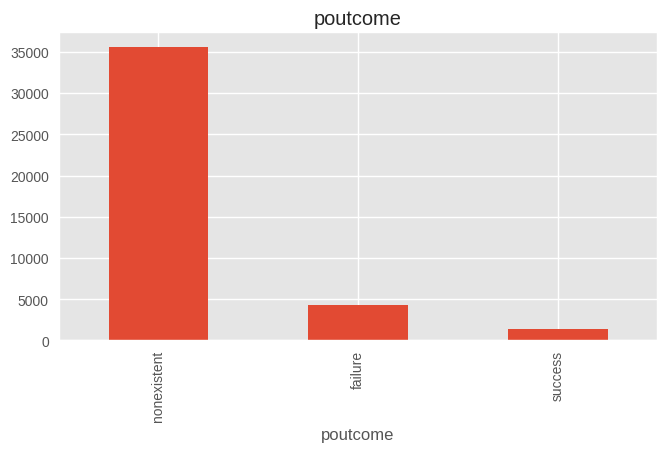

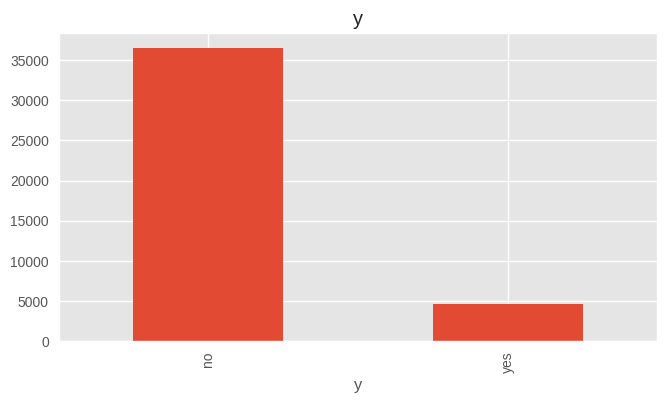

In [ ]:
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in cat_col:
    plt.figure(figsize=(17,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

##Observations :

*   The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
*   A huge number of the customers are married.
*   Many customers have either university degress or a high school education and very few are illiterate.
*   Majority of the customers do not have a credit in default.
*   Many of our past customers have applied for a housing loan but very few have applied for personal loans.
*   Cell-phones seem to be the most favoured method of reaching out to customers.
*   Many customers have been contacted in the month of May.
*   Customer interactions are fairly consistent across weekdays with slightly higher counts on Thursday and Monday.





##Univariate Analysis of Continuous Columns

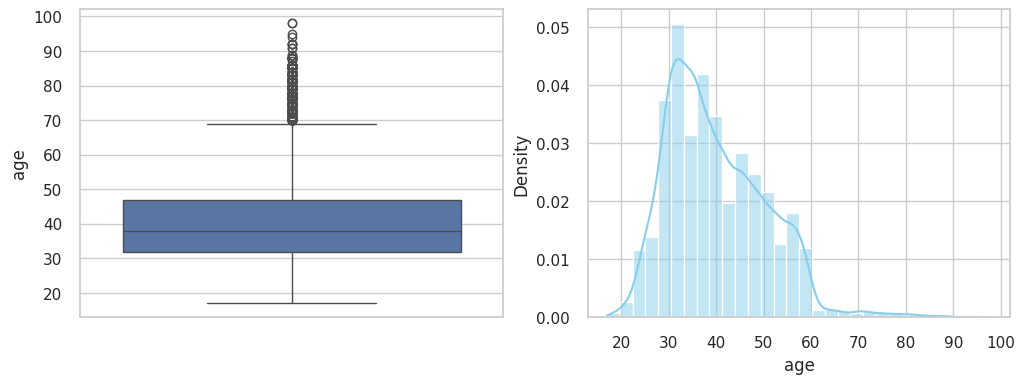

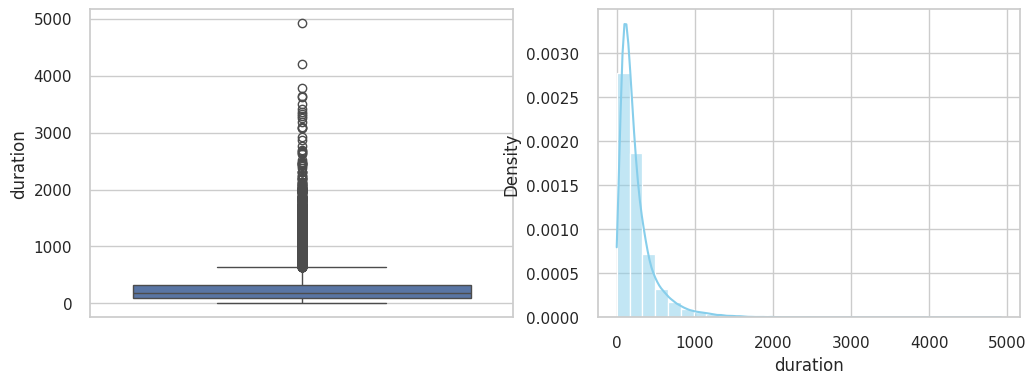

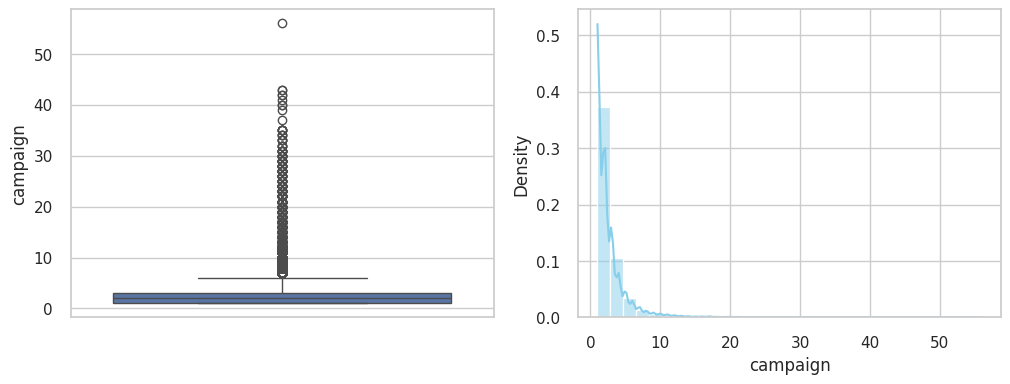

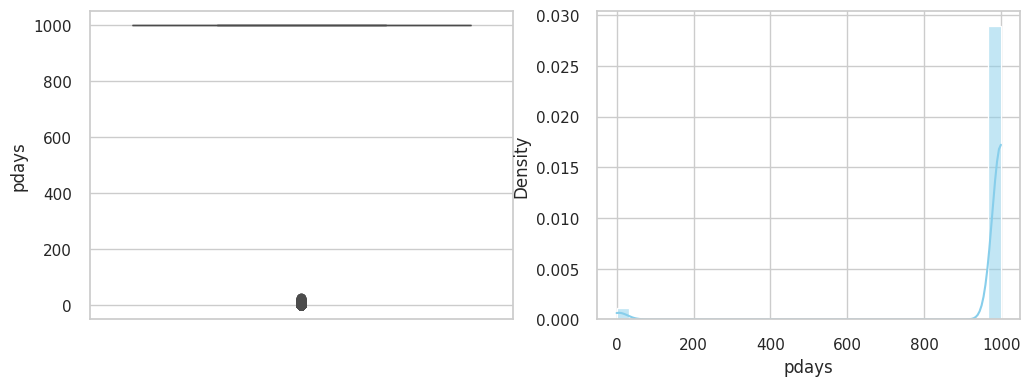

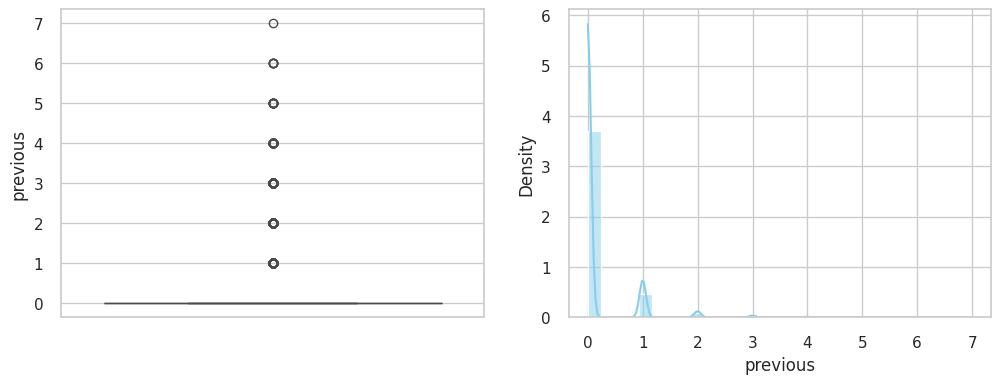

In [ ]:
for var in num_col:
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.boxplot(y = df[var])

  plt.subplot(1,2,2)
  sns.histplot(df[var], kde=True, stat="density", bins=30, color='skyblue')

##Correlation Heatmap

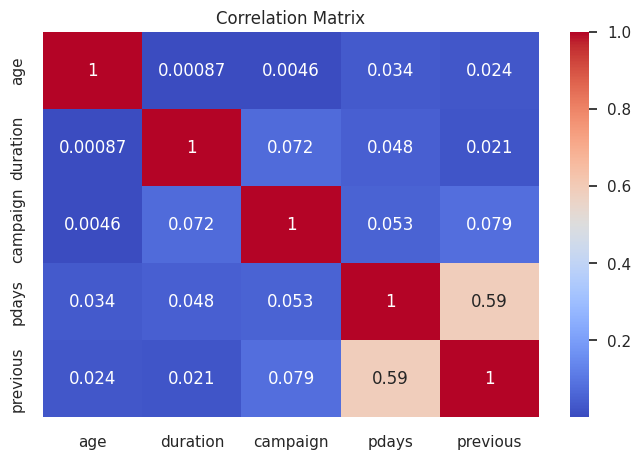

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(abs(df[num_col].corr()),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

##Observation

*  As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.
*  Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.

*  Most features have very low pairwise correlations (close to 0), indicating low linear relationships among them.The only notable correlation is between pdays and previous (correlation = 0.59), which is moderately high.
*   Among the two, they provide overlapping information related to previous contacts.

Since the features pdays and previous consist majorly only of a single value, their variance is quite less and they are highly correlated to each other so we can drop them since technically they will be of no help in prediction.





##Bivariate Analysis of Categorical Columns

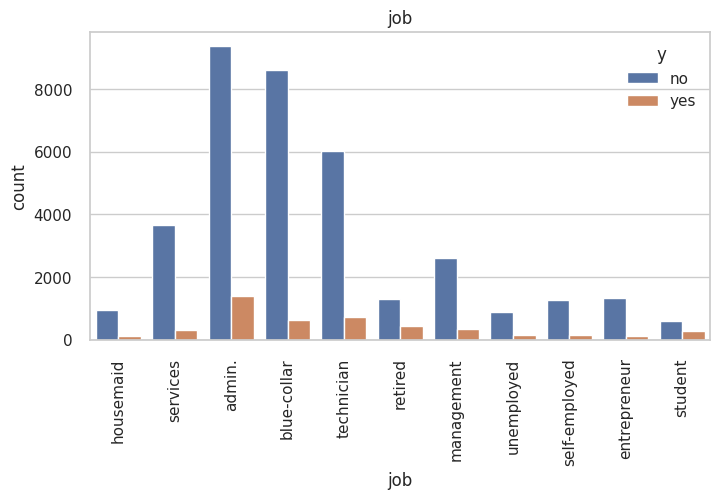

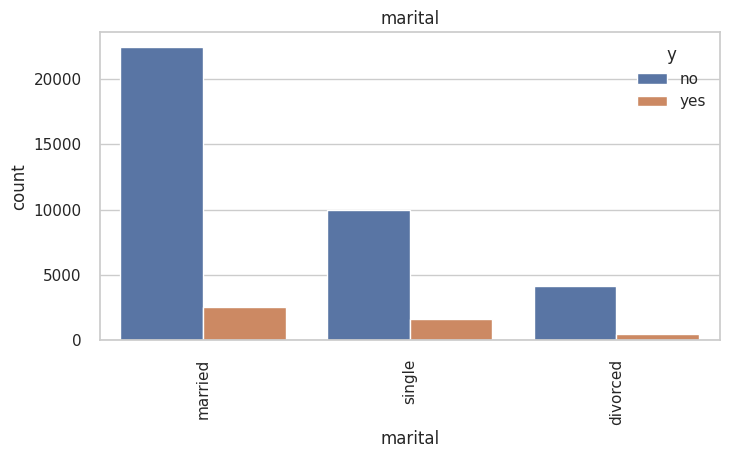

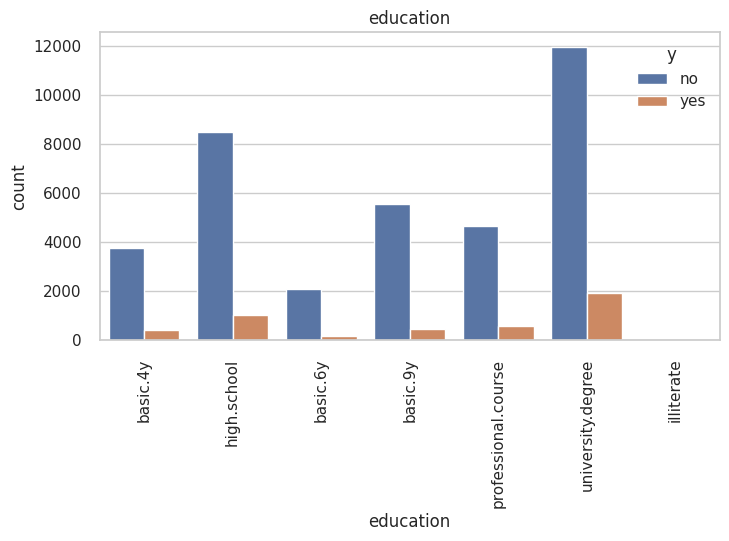

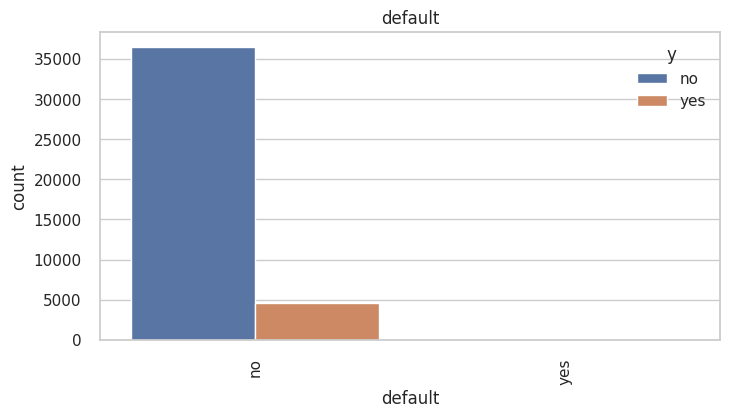

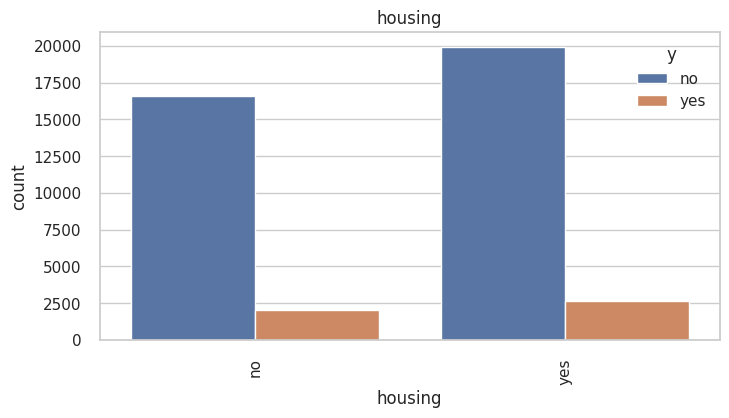

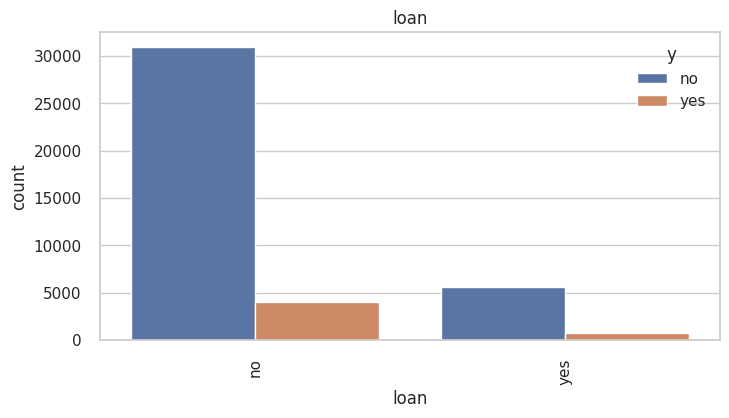

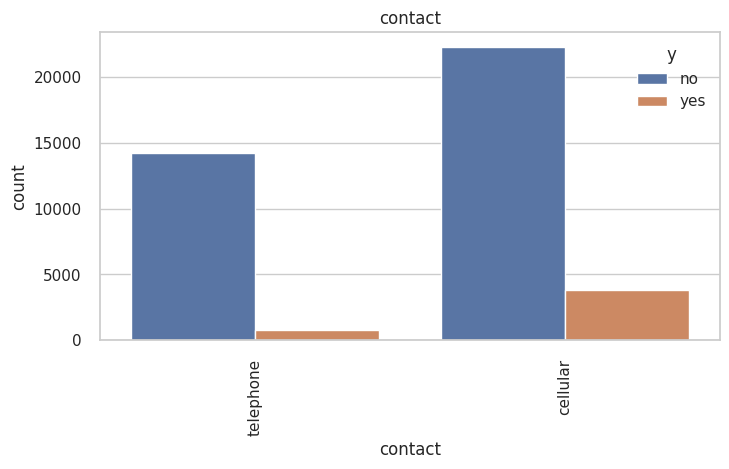

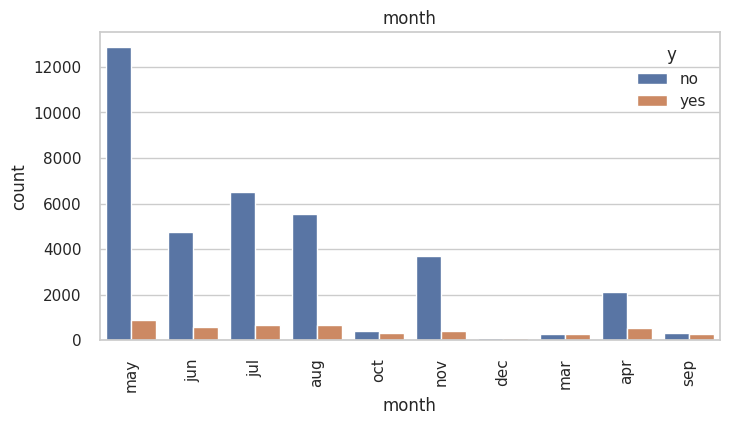

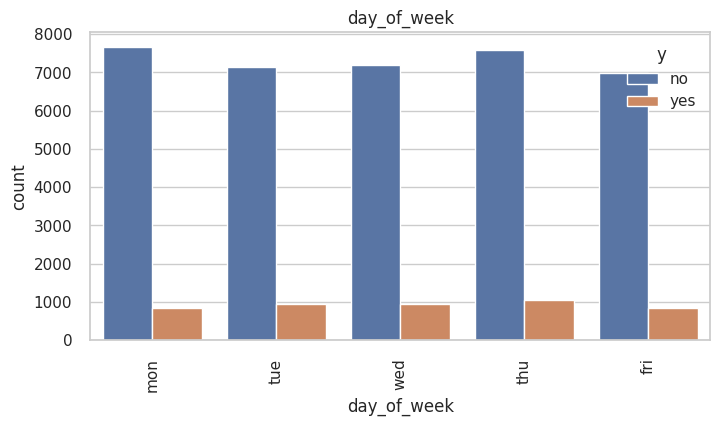

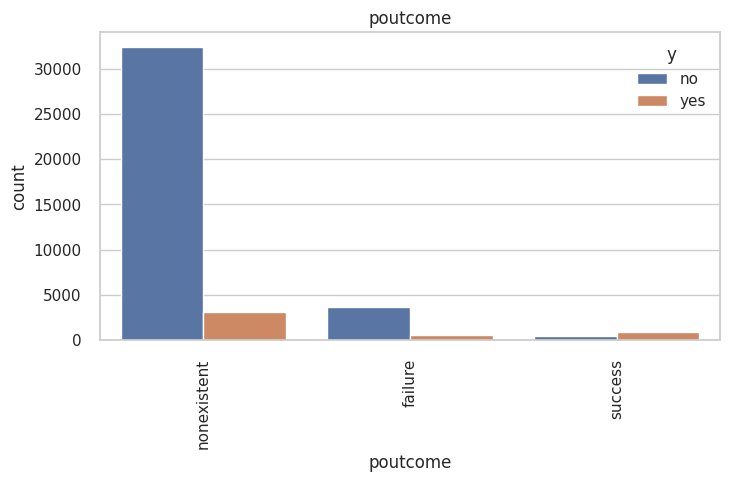

In [ ]:
for col in cat_col:
  if(col != 'y'):
    plt.figure(figsize=(8,4))
    sns.countplot(x = df[col] , hue = df['y'] , data = df)
    plt.title(col)
    plt.xticks(rotation = 90)

##Observations

*   Customers with administrative jobs form the largest group among those who subscribed to the term deposit, followed by those working as technicians.
*   They are married.
*   They hold a university degree.
*   They do not hold a credit in default.
*   Customers with housing loans are more in number overall, but the difference in term deposit subscription between those with and without housing loans is relatively small.
*   Customers without personal loans are significantly more likely to subscribe to term deposits compared to those who have personal loans.
*   Cell-phones should be the preferred mode of contact for contacting customers.
*   Most term deposit subscriptions occurred between May and August, with May showing the highest number of both contacts and subscriptions.
*   Most term deposit subscriptions came from customers who were never contacted before (poutcome = nonexistent), indicating the success of fresh marketing outreach over follow-ups.










#Data Preprocessing

In [ ]:
df.drop(['pdays','previous'],axis = 1,inplace = True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,no


##Detect Outliers in the Continuous Columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond (third quartile + 1.5xIQR) and below (first quartile - 1.5xIQR).

In [ ]:
def detect_outliers(x):
  q1,q3 =np.percentile(x,[25,75])
  iqr = q3 - q1
  lb = q1 - (1.5 * iqr)
  ub = q3 + (1.5 * iqr)
  return np.where((x < lb) | (x > ub))
numeric_data = df.select_dtypes(include = np.number)
for col in numeric_data:
    print(detect_outliers(df[col]))

(array([27713, 27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811,
       27812, 27813, 27814, 27815, 27816, 27817, 27818, 27826, 27837,
       27838, 27844, 27851, 27875, 27879, 27902, 27930, 27950, 27951,
       27963, 28220, 28221, 28312, 28456, 28504, 28530, 28540, 28586,
       28619, 28732, 28773, 29225, 29263, 29498, 29625, 29668, 29682,
       29973, 29977, 29981, 29987, 29990, 30000, 30004, 30006, 30072,
       30078, 30079, 30088, 30103, 30110, 30133, 30171, 30214, 30225,
       30227, 30241, 30334, 30335, 30390, 30430, 30460, 30589, 35833,
       35848, 35856, 35878, 35973, 36183, 36285, 36311, 36383, 36384,
       36816, 36998, 37136, 37137, 37170, 37186, 37190, 37192, 37193,
       37195, 37206, 37207, 37213, 37219, 37227, 37235, 37237, 37239,
       37257, 37260, 37316, 37341, 37355, 37371, 37403, 37454, 37455,
       37472, 37479, 37493, 37505, 37509, 37512, 37525, 37532, 37545,
       37568, 37570, 37586, 37597, 37601, 37602, 37604, 37635, 37661,
       37675, 37679

AS per the IQR methodology , these are the outliers in all of the columns.

##Treating outliers in the continuous columns using Winsorization.



*   Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
*   To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
To reduce left skewness, we take squares or cubes or higher powers.

*   But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
*  Hence, for this data, we use a method called Winsorization. In this method, we define a confidence interval of, say, 80–90%, and then replace values below the 10th percentile with the 10th percentile value, and values above the 90th percentile with the 90th percentile value. This is especially useful when the data contains zeros or negative values that cannot be treated using log or square root transformations.





In [ ]:
numeric_col = df.select_dtypes(include = np.number).columns
numeric_col

Index(['age', 'duration', 'campaign'], dtype='object')

In [ ]:
for col in numeric_col:
  df[col] = winsorize(df[col] , limits = [0.1,0.1] , inclusive = (True , True))

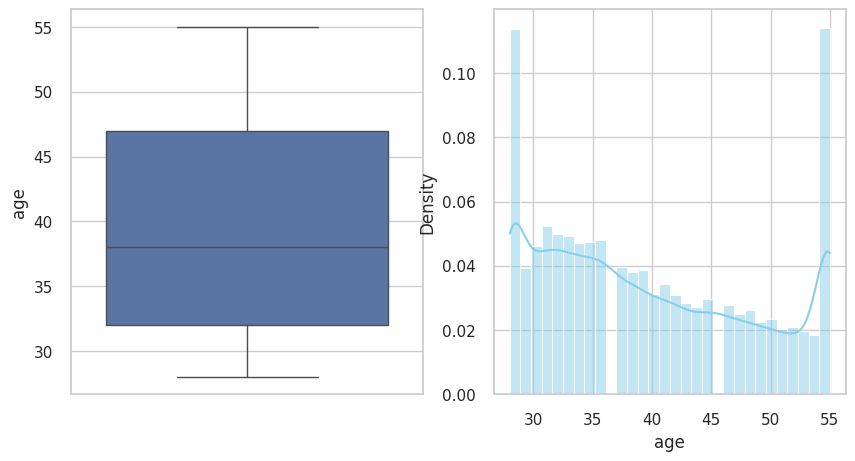

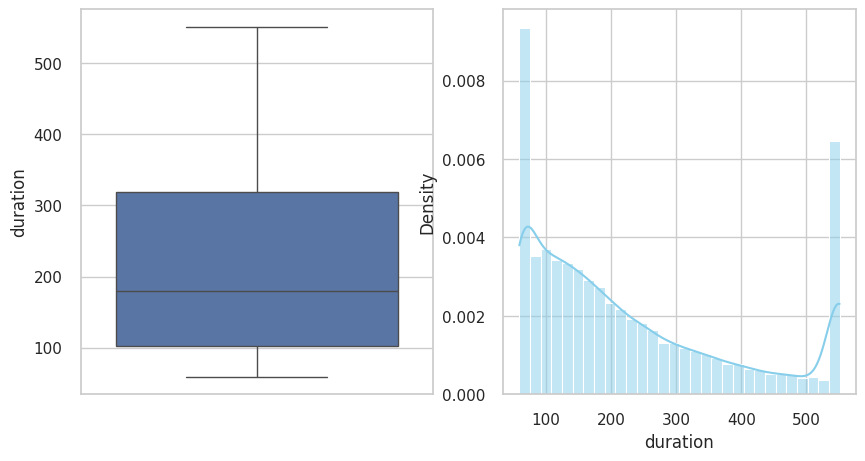

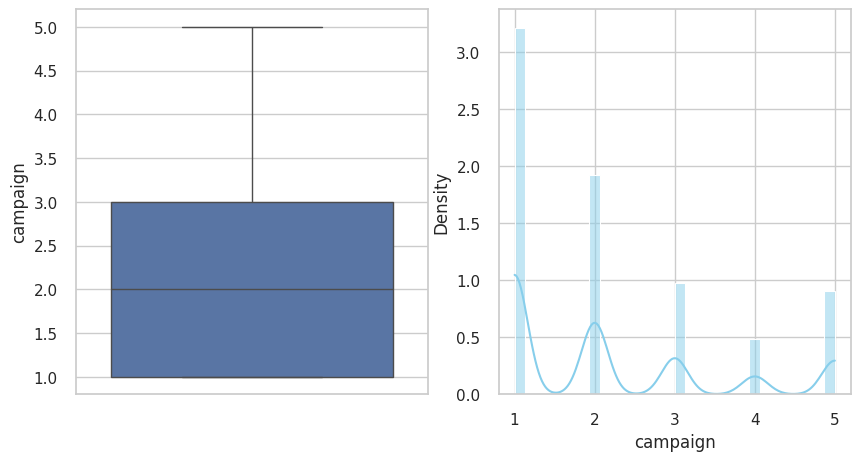

In [ ]:
for var in numeric_col:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.boxplot(y = df[var])

  plt.subplot(1,2,2)
  sns.histplot(df[var], kde=True, stat="density", bins=30, color='skyblue')

##One Hot Encoding

In [ ]:
encoder = OneHotEncoder(drop = 'first' , sparse_output = False)
for feature in cat_col:
  try:
    encoded = encoder.fit_transform(df[[feature]])
    col_names = encoder.get_feature_names_out([feature])
    encoded_df = pd.DataFrame(encoded,columns = col_names,index = df.index)
    df.drop(columns = [feature],inplace=True)
    df = pd.concat([df , encoded_df],axis = 1)
  except Exception as e:
        print('Error encoding', feature, ":", e)


In [ ]:
df

,age,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,55,261,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,55,149,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,226,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,151,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,55,307,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,55,334,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,46,383,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,55,189,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,44,442,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df.shape

(41188, 41)

The dataset was split into training and testing sets using an 80-20 ratio. To handle class imbalance in the training data, the SMOTETomek technique was applied, which combines over-sampling the minority class and removing overlapping majority class instances. This resulted in a more balanced and cleaner training set.

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train ,X_test ,y_train ,y_test =  train_test_split(X ,y ,test_size = 0.2 , random_state = 42)

smote = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled =  smote.fit_resample(X_train, y_train)


#SOME IMPORTANT FUNCTIONS

In [ ]:
def check_scores (model , x_train, x_test,y_train,y_test):

  train_class_preds = model.predict(x_train)
  test_class_preds = model.predict(x_test)

  train_preds = model.predict_proba(x_train)[:,1]
  test_preds = model.predict_proba(x_test)[:,1]

  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()

  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds)

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  train_auc = roc_auc_score(y_train,train_preds)
  test_auc = roc_auc_score(y_test,test_preds)

  print('AUC on train data:', train_auc)
  print('AUC on test data:', test_auc)

  f1 = f1_score(y_test, test_class_preds)
  precision = precision_score(y_test, test_class_preds)
  recall = recall_score(y_test, test_class_preds)

  train_log = log_loss(y_train,train_preds)
  test_log = log_loss(y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F1 score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_preds)
  plt.plot(false_positive_rate, true_positive_rate)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')
  plt.show()

  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log

def grid_search(model,parameters,X_train,y_train):
  grid = GridSearchCV(estimator = model, param_grid = parameters , cv = 5,verbose = 2 , scoring = 'roc_auc')
  grid.fit(X_train,y_train)
  print()
  print()

  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

#1.Logistic Regression

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train_rescaled = X_train_resampled.copy()
X_test_rescaled = X_test.copy()
X_train_rescaled[numeric_col] = scaler.fit_transform(X_train_rescaled[numeric_col])
X_test_rescaled[numeric_col] = scaler.transform(X_test_rescaled[numeric_col])


In [ ]:
X_train_rescaled

,age,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.050668,-1.171068,0.039506,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
1,-0.908385,-1.047940,1.633202,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,1.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
2,1.649090,-1.366952,2.430050,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,1.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.370353,-1.171068,2.430050,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
4,-0.055893,0.228108,0.039506,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,1.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58449,1.649090,-0.919216,-0.757342,0.0,0.0,0.0,0.882465,0.117535,0.0,0.0,...,0.0,0.882465,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
58450,-1.228069,-0.773702,-0.757342,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.884893,0.0,0.0,0.000000,0.000000,0.115107,0.884893,0.000000,1.0
58451,-0.801823,-0.085307,-0.757342,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.027696,0.0
58452,-0.801823,1.269095,-0.757342,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.205825,0.794175,0.000000,0.000000,1.000000,0.0


In [ ]:
#Parameter grid for logistic regression
solvers = ['lbfgs','liblinear']
penalty = ['l2']
c_values = [100,10,1.0,0.1,0.01]

#You are creating a dictionary called lr_parameters that defines the grid of hyperparameters to test for Logistic Regression.
lr_parameters = dict(solver = solvers , penalty = penalty , C = c_values)

#finding the best model
lr_optimal_model = grid_search(LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0), lr_parameters, X_train_rescaled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END .....................C=10, penalty=l2, 

Getting The Scores

The accuracy on train dataset is 0.853645601669689
The accuracy on test dataset is 0.8340616654527798

Train confusion matrix:
[[24461  4766]
 [ 3789 25438]]

Test confusion matrix:
[[6100 1203]
 [ 164  771]]

AUC on train data: 0.9226018364696893
AUC on test data: 0.9057772023950306

Train log loss: 0.35344507162040484
Test log loss: 0.39895734194388643

F1 score is: 0.5300790649707804
Precision is: 0.3905775075987842
Recall is: 0.8245989304812834


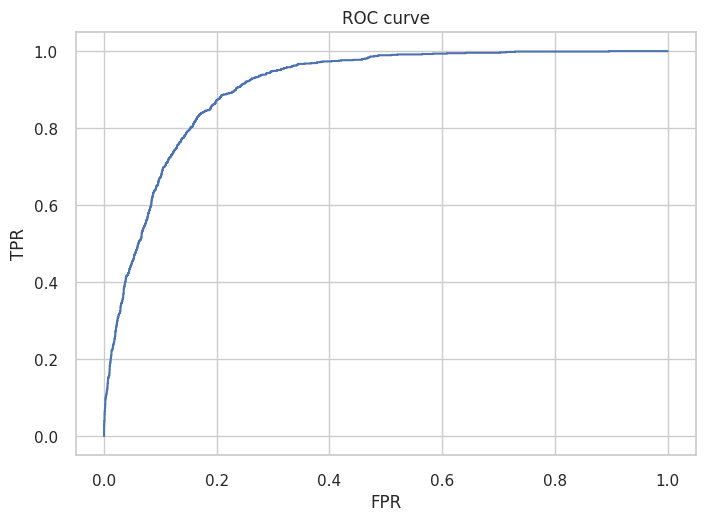

In [ ]:
lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores (lr_optimal_model, X_train_rescaled, X_test_rescaled, y_train_resampled, y_test)

#2.Decision Tree Classifier

In [ ]:
dtcmodel = DecisionTreeClassifier(random_state = 0)
param_grid = {
    'max_features':['sqrt','log2'] , 'max_depth' : [4,5,6,7,8] ,
    'criterion': ['gini', 'entropy'],'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
             }
dtc_optimal_model = grid_search(dtcmodel , param_grid , X_train_resampled , y_train_resampled)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=100; t

The accuracy on train dataset is 0.8572552776542238
The accuracy on test dataset is 0.8085700412721535

Train confusion matrix:
[[24161  5066]
 [ 3278 25949]]

Test confusion matrix:
[[6011 1292]
 [ 285  650]]

AUC on train data: 0.9305268149092267
AUC on test data: 0.8319400641886969

Train log loss: 0.32491623814048626
Test log loss: 0.38262398818042354

F1 score is: 0.4518595759471672
Precision is: 0.33470648815653964
Recall is: 0.6951871657754011


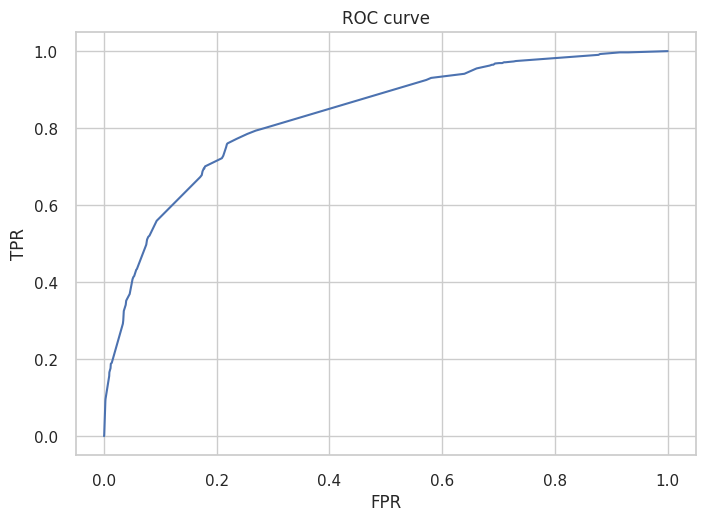

In [ ]:
dtc_model, dtc_train_auc, dtc_test_auc, dtc_train_accuracy, dtc_test_accuracy, dtc_f1, dtc_precision, dtc_recall, dtc_train_log, dtc_test_log = check_scores(
    dtc_optimal_model,
    X_train_resampled,
    X_test,
    y_train_resampled,
    y_test
)

#3.Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 80, 100],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
}
rf_optimal_model = grid_search(
    rfc,
    param_grid,
    X_train_resampled,
    y_train_resampled
)



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.8s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=40, min_samples_split=50, n_estimators=80; tot

The accuracy on train dataset is 0.9325965716631881
The accuracy on test dataset is 0.8824957513959699

Train confusion matrix:
[[26877  2350]
 [ 1590 27637]]

Test confusion matrix:
[[6675  628]
 [ 340  595]]

AUC on train data: 0.9825272503861251
AUC on test data: 0.9049882804004801

Train log loss: 0.29497287051690296
Test log loss: 0.34019346991165655

F1 score is: 0.5514365152919369
Precision is: 0.48650858544562553
Recall is: 0.6363636363636364


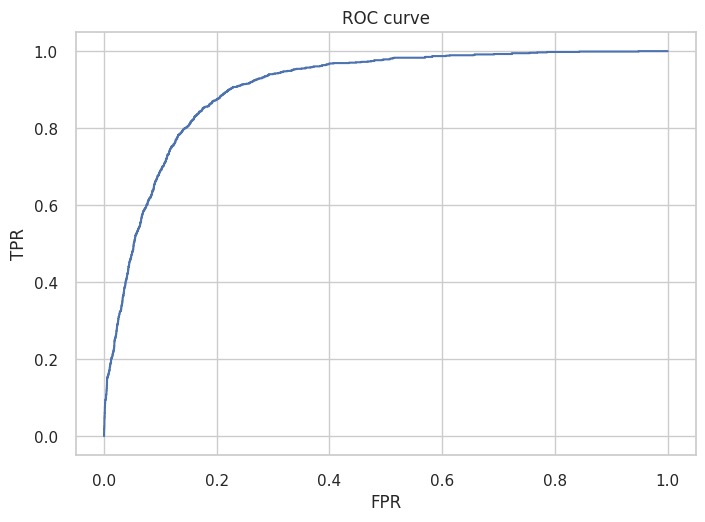

In [ ]:
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy, rf_f1, rf_precision, rf_recall, rf_train_log, rf_test_log = check_scores(
    rf_optimal_model,
    X_train_resampled,
    X_test,
    y_train_resampled,
    y_test
)

#4.XGBoost

In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2],
    'scale_pos_weight': [1]
}

xgb_model = XGBClassifier(random_state=0, eval_metric='logloss')
xgb_optimal_model = grid_search( xgb_model, xgb_param_grid, X_train_resampled, y_train_resampled)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1

The accuracy on train dataset is 0.9611318301570466
The accuracy on test dataset is 0.9016751638747269

Train confusion matrix:
[[28387   840]
 [ 1432 27795]]

Test confusion matrix:
[[6978  325]
 [ 485  450]]

AUC on train data: 0.9946163361861894
AUC on test data: 0.9212054821804239

Train log loss: 0.09461085276974035
Test log loss: 0.21101856379473827

F1 score is: 0.5263157894736842
Precision is: 0.5806451612903226
Recall is: 0.48128342245989303


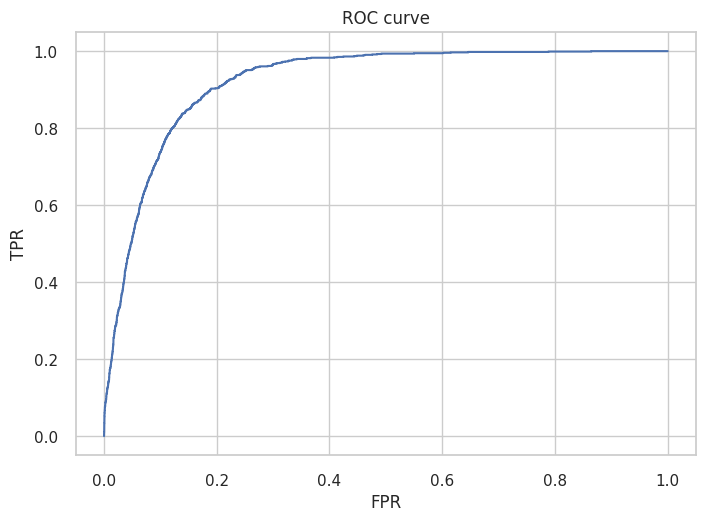

In [ ]:
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log = check_scores( xgb_optimal_model, X_train_resampled, X_test, y_train_resampled, y_test)

#5.Max Voting Classifier Model

In [ ]:
estimators = [('logistic', lr_optimal_model), ('dtc', dtc_optimal_model),('rf', rf_optimal_model),('xgb', xgb_optimal_model)]
voting_model = VotingClassifier(estimators=estimators, voting='soft')
voting_model.fit(X_train_rescaled, y_train_resampled)


VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=100, max_iter=10000,
                                                 random_state=0,
                                                 solver='liblinear')),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='sqrt',
                                                     min_samples_leaf=50,
                                                     min_samples_split=150,
                                                     random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='log2',
                                                     min_samples...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...))],
                 voting='soft')

The accuracy on train dataset is 0.9346836828959524
The accuracy on test dataset is 0.8810390871570769

Train confusion matrix:
[[26720  2507]
 [ 1311 27916]]

Test confusion matrix:
[[6608  695]
 [ 285  650]]

AUC on train data: 0.9845839138709598
AUC on test data: 0.9122919963299825

Train log loss: 0.2298357368560565
Test log loss: 0.2880263897380686

F1 score is: 0.5701754385964912
Precision is: 0.483271375464684
Recall is: 0.6951871657754011


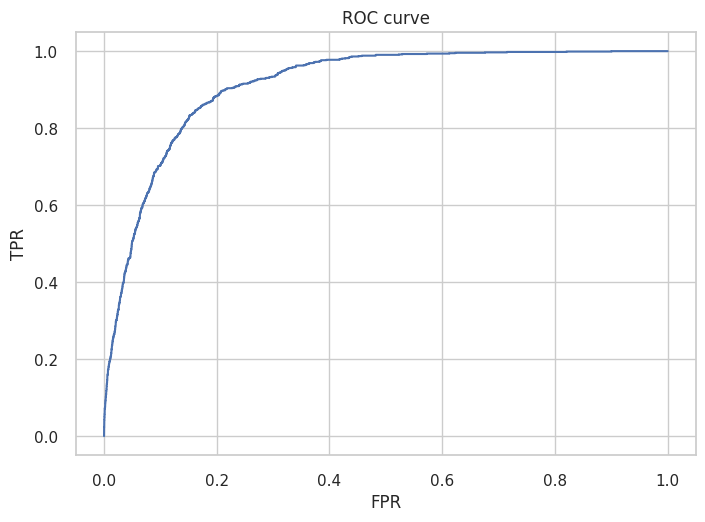

In [ ]:
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log=check_scores(voting_model, X_train_rescaled, X_test_rescaled, y_train_resampled, y_test)

#Model Evaluation

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Voting Classifier'],
    'Train Accuracy': [lr_train_accuracy, dtc_train_accuracy, rf_train_accuracy, xgb_train_accuracy, voting_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, dtc_test_accuracy, rf_test_accuracy, xgb_test_accuracy, voting_test_accuracy],
    'Test AUC': [lr_test_auc, dtc_test_auc, rf_test_auc, xgb_test_auc, voting_test_auc],
    'Test LogLoss': [lr_test_log, dtc_test_log, rf_test_log, xgb_test_log, voting_test_log],
    'Precision': [lr_precision, dtc_precision, rf_precision, xgb_precision, voting_precision],
    'Recall': [lr_recall, dtc_recall, rf_recall, xgb_recall, voting_recall],
    'F1 Score': [lr_f1, dtc_f1, rf_f1, xgb_f1, voting_f1]
})
results_df.iloc[:, 1:] = results_df.iloc[:, 1:].round(4)


In [ ]:
results_df

,Model,Train Accuracy,Test Accuracy,Test AUC,Test LogLoss,Precision,Recall,F1 Score
0,Logistic Regression,0.8536,0.8341,0.9058,0.3990,0.3906,0.8246,0.5301
1,Decision Tree,0.8573,0.8086,0.8319,0.3826,0.3347,0.6952,0.4519
2,Random Forest,0.9326,0.8825,0.9050,0.3402,0.4865,0.6364,0.5514
3,XGBoost,0.9611,0.9017,0.9212,0.2110,0.5806,0.4813,0.5263
4,Voting Classifier,0.9347,0.8810,0.9123,0.2880,0.4833,0.6952,0.5702


In [ ]:
print('Model Ranks according to their performance :')
print('1. XGBoost')
print('2. Voting Classifier')
print('3. Random Forest')
print('4. Logistic Regression')
print('5. Decision Tree')

Model Ranks according to their performance :
1. XGBoost
2. Voting Classifier
3. Random Forest
4. Logistic Regression
5. Decision Tree


I ranked the classifiers based on a combination of Test AUC (discrimination power), Log Loss (probability calibration), and Test Accuracy, giving priority to models that achieved high AUC and low Log Loss, indicating both strong classification ability and well-calibrated predictions.

#For the final part of this section, I am going to check variable importance for different Models to get an idea of important variables.

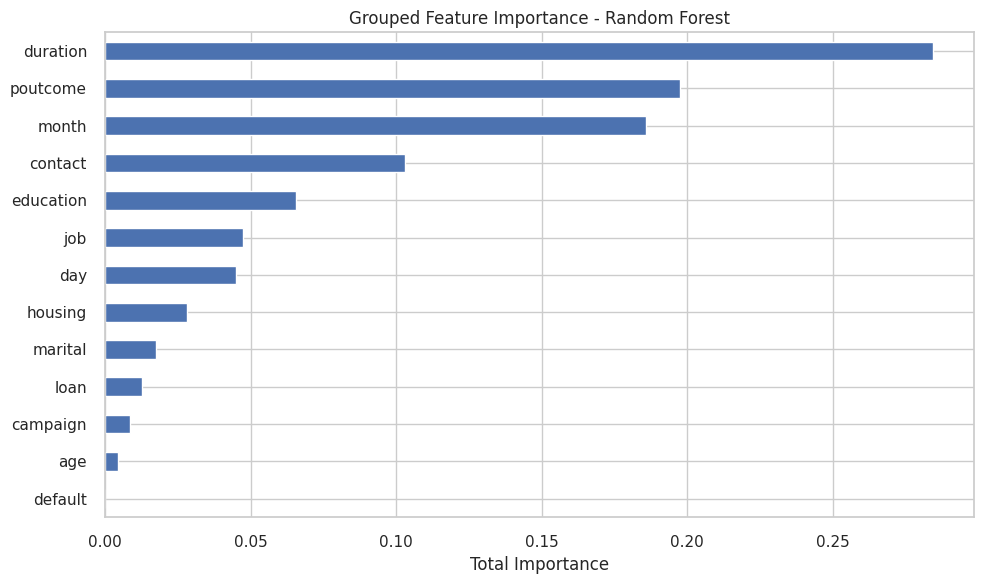

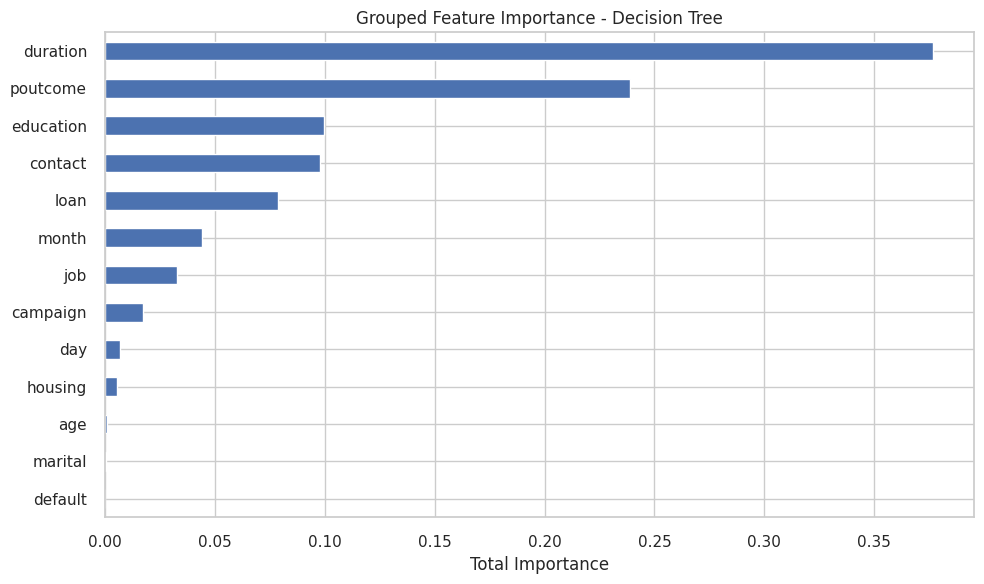

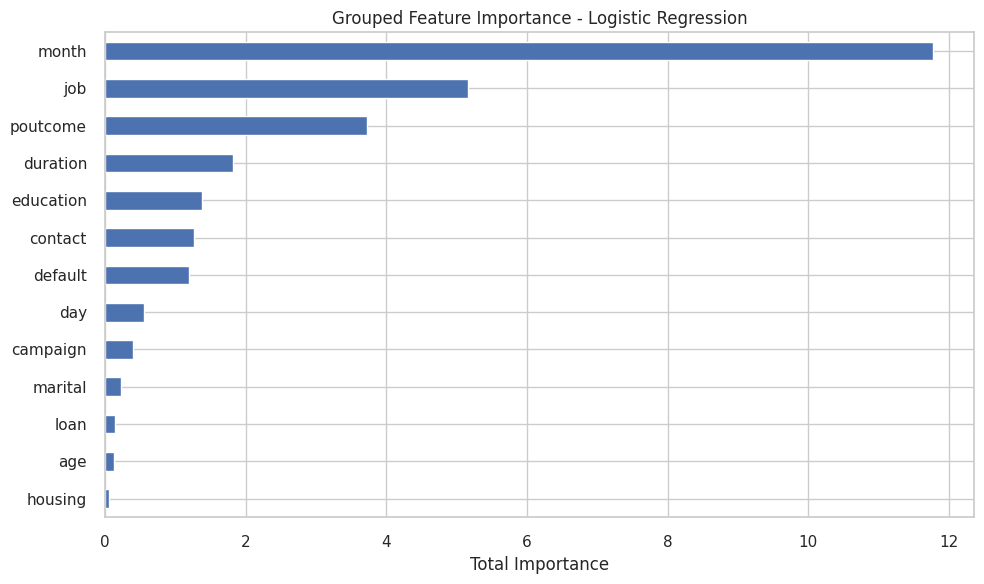

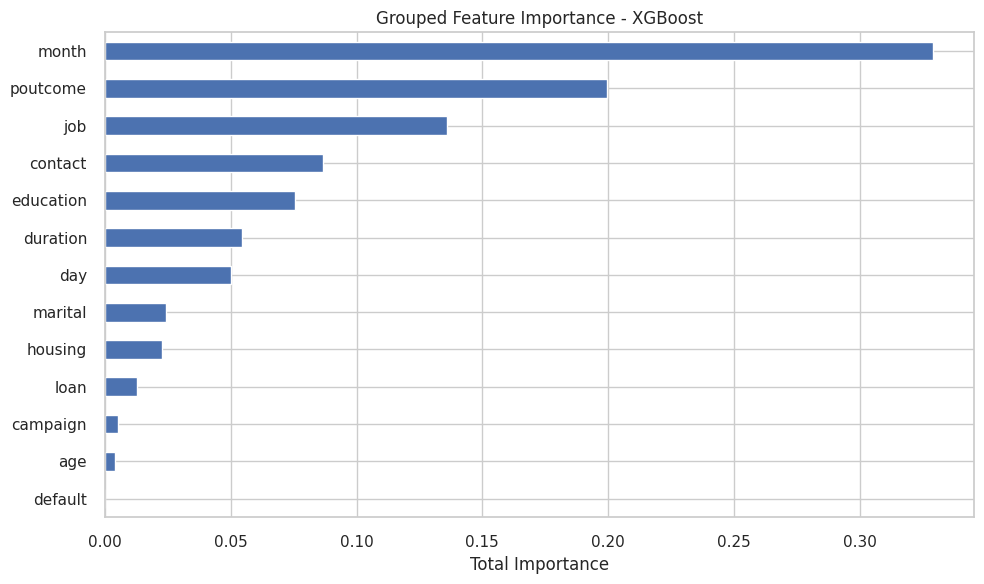

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to group and plot feature importance
def plot_grouped_importance(importance_series, title):
    # Grouping by base feature (prefix before '_')
    grouped = importance_series.groupby(lambda x: x.split('_')[0]).sum()
    grouped.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
    plt.title(title)
    plt.xlabel("Total Importance")
    plt.tight_layout()
    plt.show()

# 1. Random Forest
plot_grouped_importance(pd.Series(rf_model.feature_importances_, index=X.columns),
                        "Grouped Feature Importance - Random Forest")

# 2. Decision Tree
plot_grouped_importance(pd.Series(dtc_model.feature_importances_, index=X.columns),
                        "Grouped Feature Importance - Decision Tree")

# 3. Logistic Regression (absolute coefficients)
lr_coeffs = lr_optimal_model.coef_.reshape(-1)
coeffs_logistic_model = pd.Series(lr_coeffs, index=X.columns)
plot_grouped_importance(coeffs_logistic_model.abs(),
                        "Grouped Feature Importance - Logistic Regression")

# 4. XGBoost (Gradient Boosting)
plot_grouped_importance(pd.Series(xgb_model.feature_importances_, index=X.columns),
                        "Grouped Feature Importance - XGBoost")


The feature importance analysis across models shows that "duration" is highly influential in Decision Tree and Random Forest models, while "month" dominates in Logistic Regression and XGBoost. "poutcome", "job", and "contact" also consistently appear as important features across all models. This suggests these variables play a key role in predicting the target outcome and should be prioritized during modeling and interpretation.

#Final Verdict

The classification models successfully predict whether a customer will subscribe to a term deposit, with XGBoost & Voting Classifier performing the best in terms of accuracy and AUC.

 Feature importance analysis reveals that variables such as "duration", "month", "poutcome", "job", and "contact" consistently influence predictions across models. These insights not only enhance model performance but also guide strategic marketing decisions by identifying key customer attributes that impact subscription behavior.